<a href="https://colab.research.google.com/github/yashinobi1773/AmazonAnalysis/blob/main/Sales_Forecasting(predictive_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving International-sale-ReportV3.xls to International-sale-ReportV3.xls


In [ ]:
df = pd.read_excel('International-sale-ReportV3.xls', usecols=['DATE', 'Style', 'GROSS AMT'])
print(df)

            DATE    Style  GROSS AMT
0     2021-06-05  MEN5004      617.0
1     2021-06-05  MEN5004      617.0
2     2021-06-05  MEN5004      617.0
3     2021-06-05  MEN5009      617.0
4     2021-06-05  MEN5011      617.0
...          ...      ...        ...
18630 2022-04-30    J0280     1812.5
18631 2022-04-30   SET350     1512.5
18632 2022-04-30   SET350     1512.5
18633 2022-04-30    J0242     1312.5
18634 2022-04-30   SET043     1020.0

[18635 rows x 3 columns]


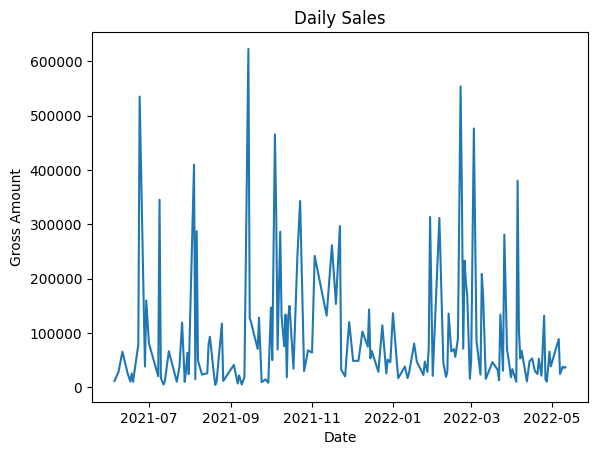

          DATE  GROSS AMT
0   2021-06-05   11685.00
1   2021-06-08   27989.00
2   2021-06-11   65504.00
3   2021-06-15   25195.00
4   2021-06-17   10547.00
..         ...        ...
157 2022-05-06   88915.10
158 2022-05-07   24555.45
159 2022-05-09   38182.89
160 2022-05-10   35930.00
161 2022-05-11   36900.00

[162 rows x 2 columns]


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
daily_sales = df.groupby('DATE')['GROSS AMT'].sum().reset_index()

plt.plot(daily_sales['DATE'].values, daily_sales['GROSS AMT'].values)
plt.xlabel('Date')
plt.ylabel('Gross Amount')
plt.title('Daily Sales')
plt.show()
print(daily_sales)



In [ ]:
daily_sales_prophet = daily_sales.rename(columns={'DATE': 'ds', 'GROSS AMT': 'y'})
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(daily_sales_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpj6exy9sq/_b5g8uuw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj6exy9sq/y91me4lu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85042', 'data', 'file=/tmp/tmpj6exy9sq/_b5g8uuw.json', 'init=/tmp/tmpj6exy9sq/y91me4lu.json', 'output', 'file=/tmp/tmpj6exy9sq/prophet_modela3u4g_em/prophet_model-20230504142726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=100,freq='MS')
forecast = model.predict(future)

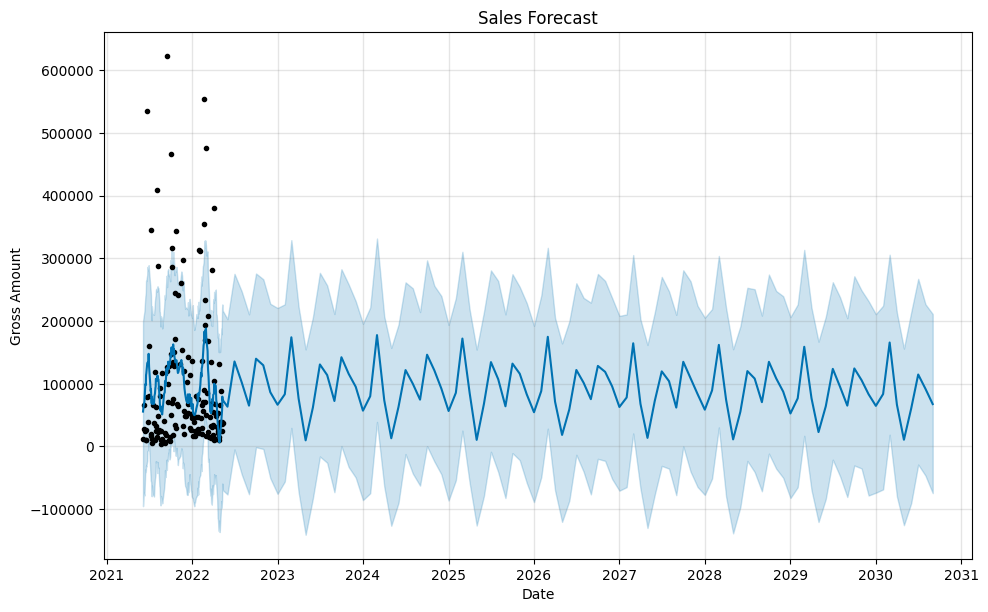

In [ ]:
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Gross Amount')
plt.title('Sales Forecast')
plt.show()